## 7.2.4 Seaborn

First, install Seaborn:

```bash
pip install seaborn
```

Load the wine quality dataset and display its structure:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
wine_quality = pd.read_csv('./data/winequality-red.csv')
print(wine_quality.head().T)

                            0        1       2       3        4
fixed acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile acidity       0.7000   0.8800   0.760   0.280   0.7000
citric acid            0.0000   0.0000   0.040   0.560   0.0000
residual sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free sulfur dioxide   11.0000  25.0000  15.000  17.000  11.0000
total sulfur dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000
quality                5.0000   5.0000   5.000   6.000   5.0000


Create a distribution plot of wine quality:

<Figure size 1000x600 with 0 Axes>

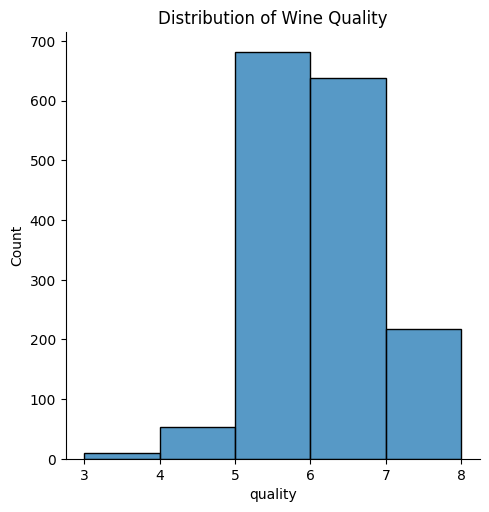

In [4]:
plt.figure(figsize=(10, 6))
sns.displot(data=wine_quality, 
            x='quality', 
            binwidth=1,
            )
plt.title('Distribution of Wine Quality')
plt.savefig('./images/ch07_16.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

Create multiple histograms using subplots:

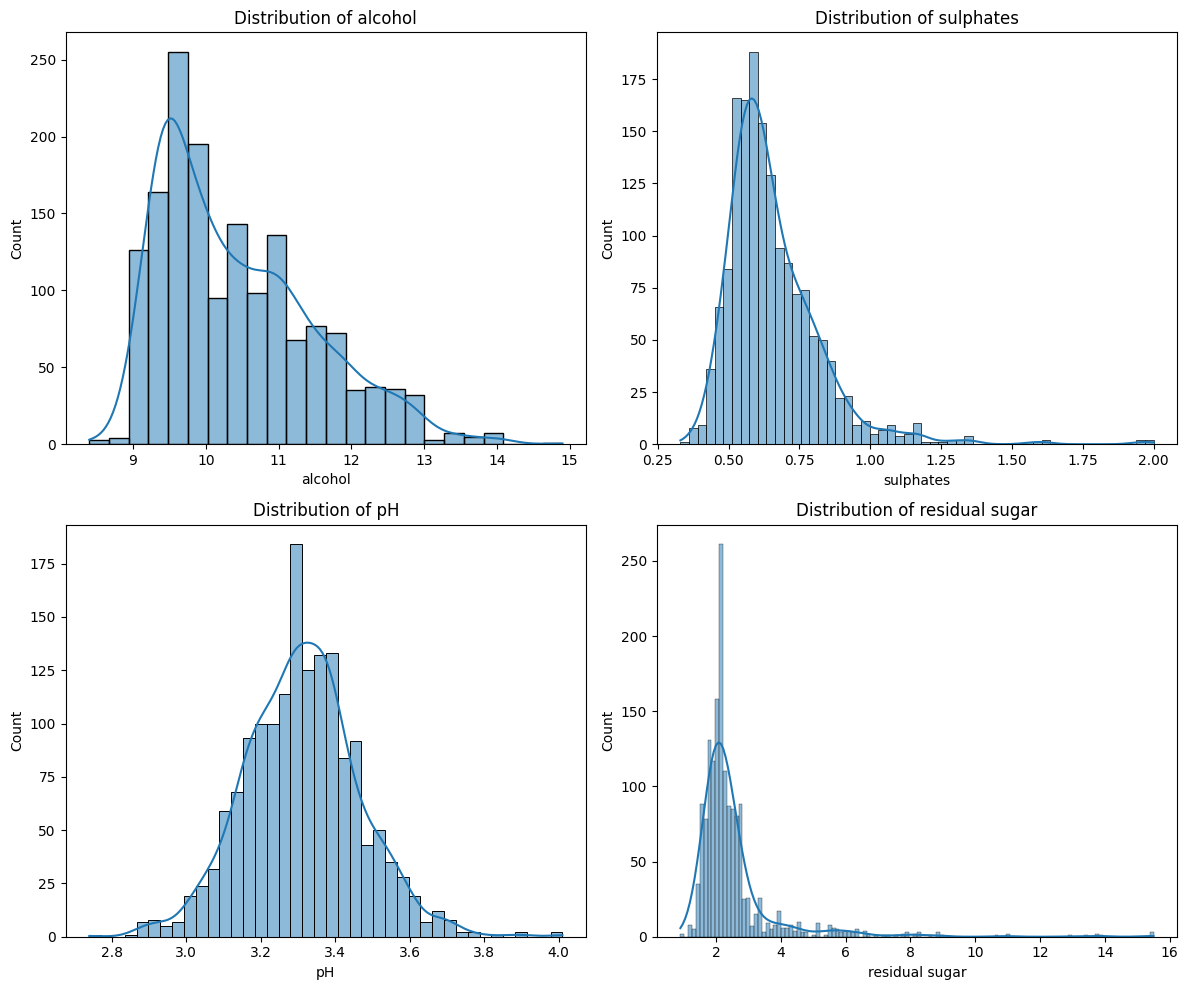

In [101]:
features = ['alcohol', 'sulphates', 'pH', 'residual sugar']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=wine_quality, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.savefig('./images/ch07_18.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

Create a boxplot comparing alcohol content across quality ratings:

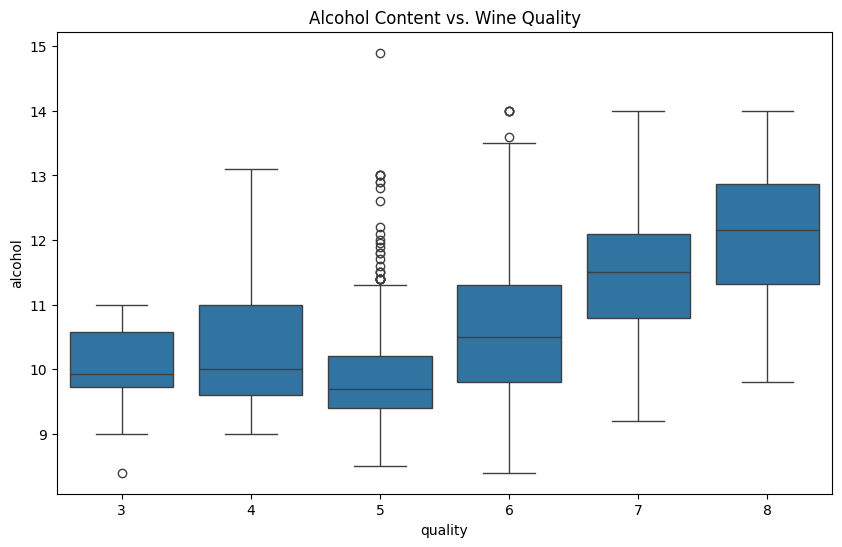

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_quality)
plt.title('Alcohol Content vs. Wine Quality')
plt.savefig('./images/ch07_18.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

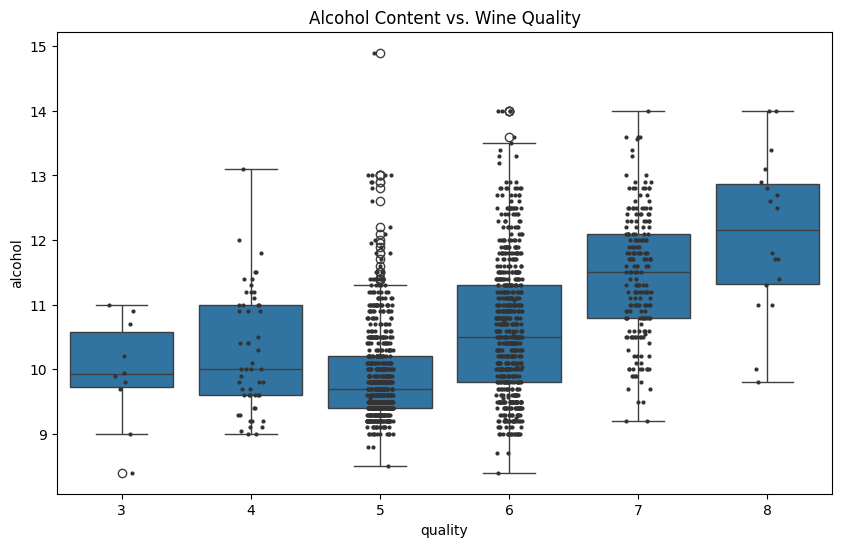

In [93]:
# Add in points to show each observation
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_quality)
sns.stripplot(x="quality", y="alcohol", data=wine_quality, size=3, color=".2", jitter=True)
plt.title('Alcohol Content vs. Wine Quality')
plt.show()


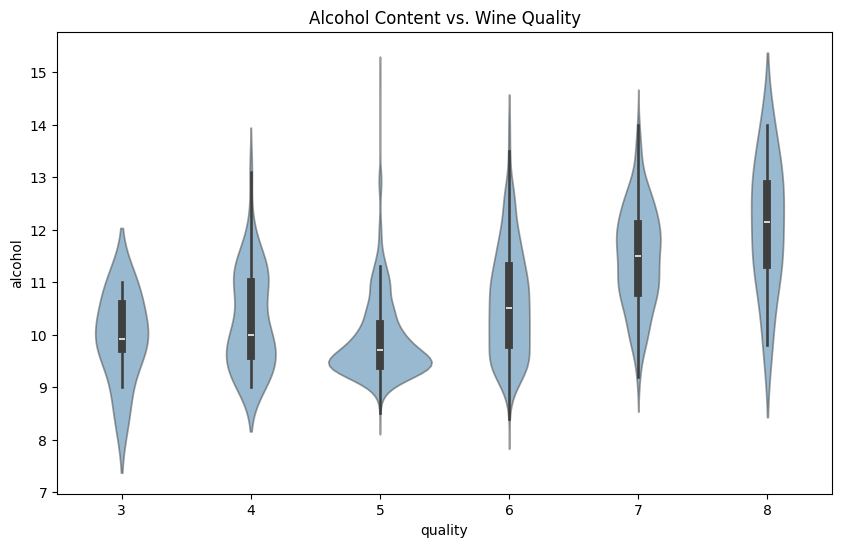

In [98]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='alcohol', data=wine_quality, alpha=0.5)
plt.title('Alcohol Content vs. Wine Quality')
plt.show()

Create a scatter plot with multiple variables:

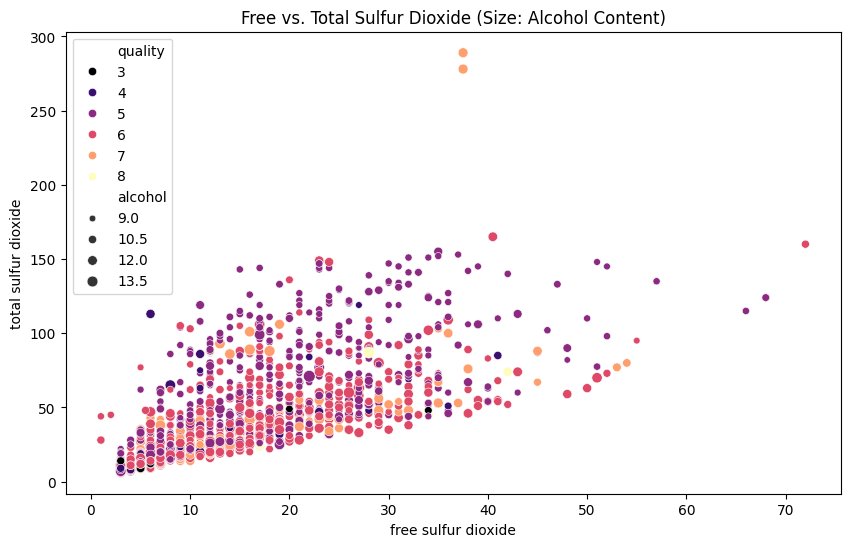

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', hue='quality', size='alcohol', data=wine_quality, palette='magma')
plt.title('Free vs. Total Sulfur Dioxide (Size: Alcohol Content)')
plt.savefig('./images/ch07_20.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

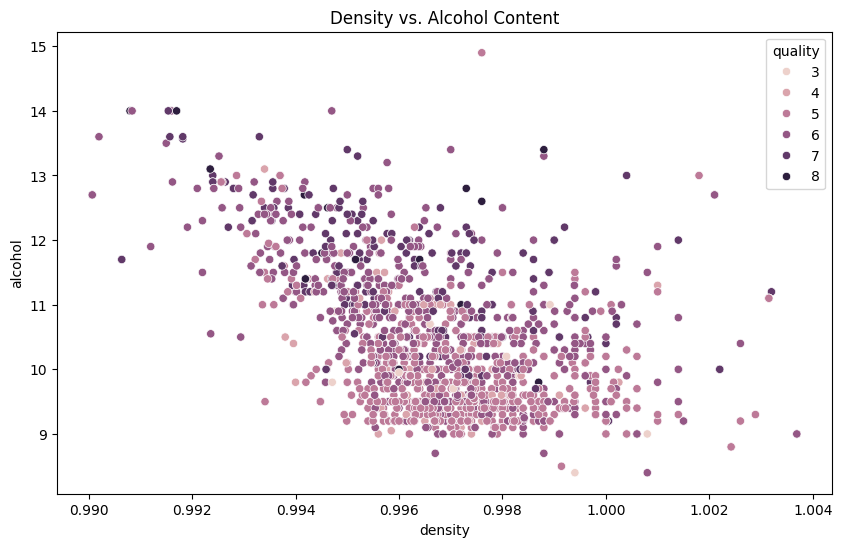

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', hue='quality', data=wine_quality)
plt.title('Density vs. Alcohol Content')
plt.show()

Create multiple scatter plots side by side:

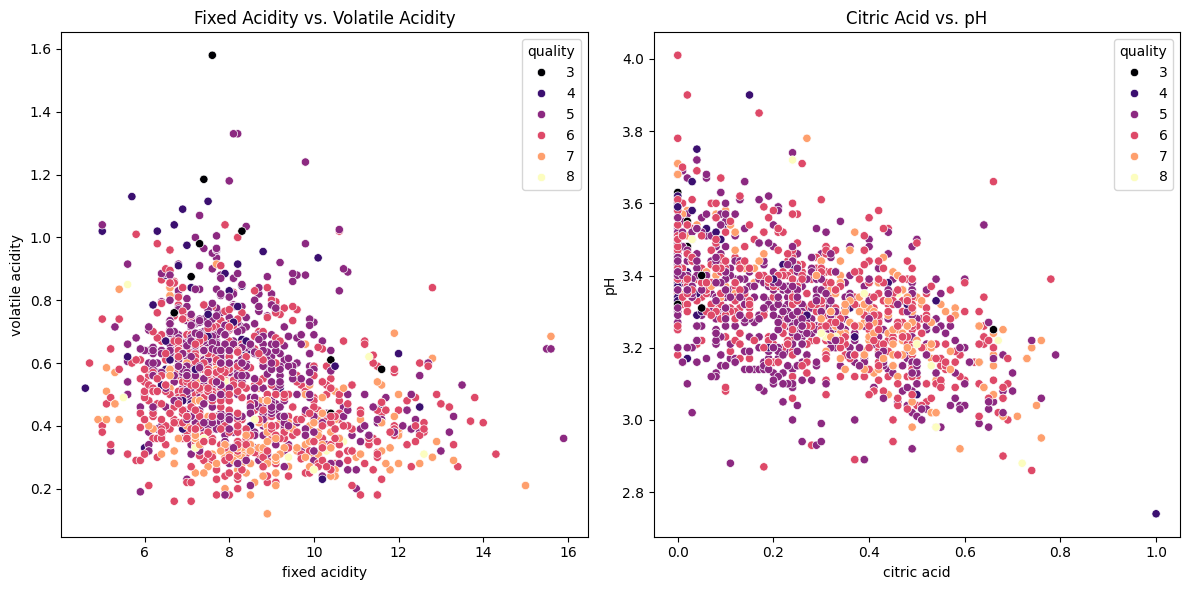

In [111]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='quality', data=wine_quality, palette='magma')
plt.title('Fixed Acidity vs. Volatile Acidity')

plt.subplot(1, 2, 2)
sns.scatterplot(x='citric acid', y='pH', hue='quality', data=wine_quality, palette='magma')
plt.title('Citric Acid vs. pH')
plt.tight_layout()
plt.savefig('./images/ch07_21.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

Create a 3D scatter plot:

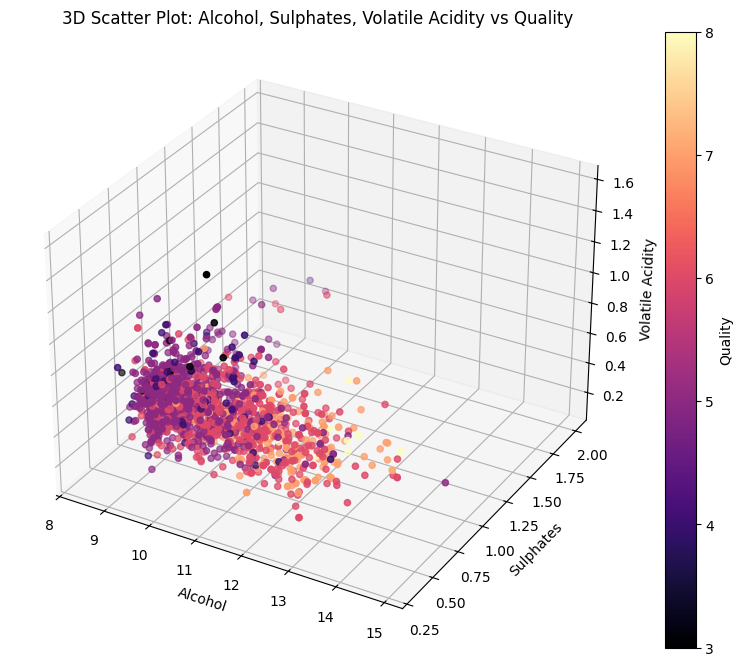

In [113]:

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
scatter = ax.scatter(wine_quality['alcohol'], wine_quality['sulphates'], wine_quality['volatile acidity'], c=wine_quality['quality'], cmap='magma')
ax.set_xlabel('Alcohol')
ax.set_ylabel('Sulphates')
ax.set_zlabel('Volatile Acidity')
plt.colorbar(scatter, label='Quality')
plt.title('3D Scatter Plot: Alcohol, Sulphates, Volatile Acidity vs Quality')
plt.savefig('./images/ch07_22.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

Create a correlation heatmap:

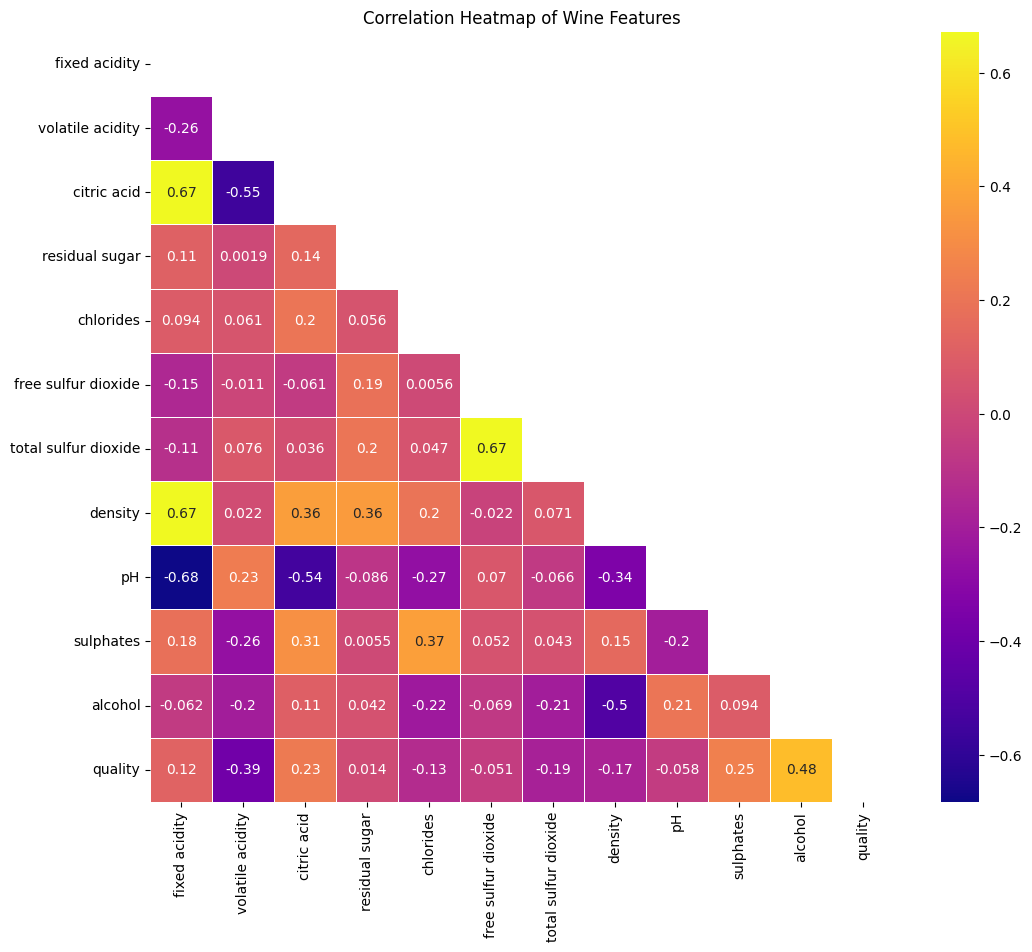

In [78]:
plt.figure(figsize=(12, 10))
corr=wine_quality.corr()
# Mask to hide upper matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.savefig('./images/ch07_17.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

Create an advanced correlation heatmap:

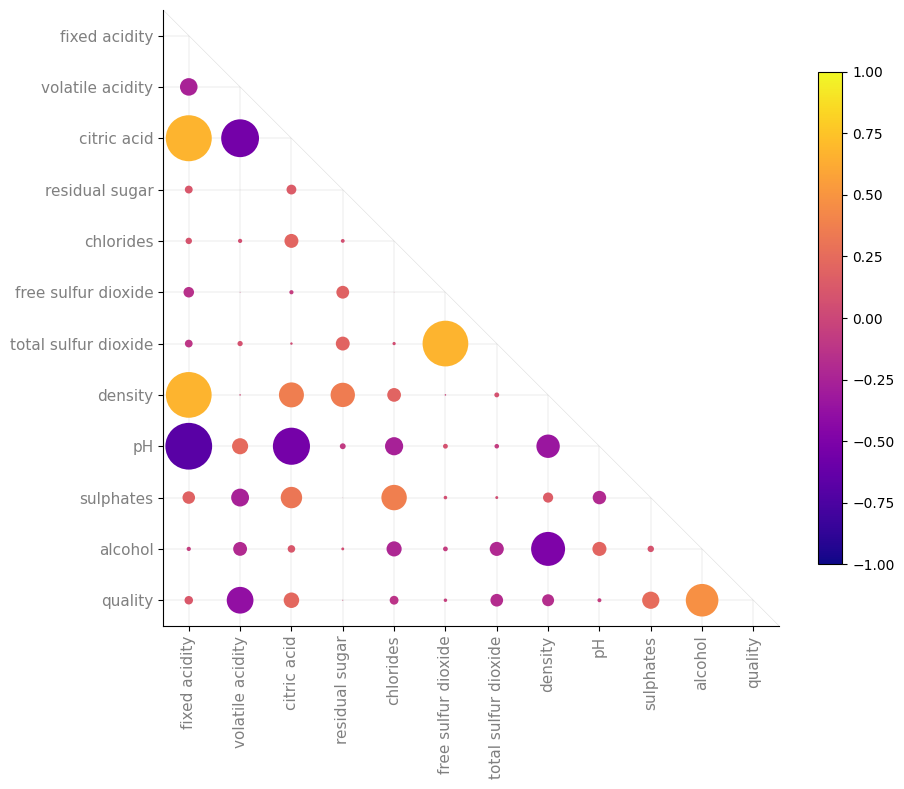

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection

import seaborn as sns

color_palette = "plasma"

# create a white grid with the same dimensions as the correlation matrix
corr_matrix = wine_quality.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor('white')

# create a mask for the lower triangle of the matrix (excluding the diagonal)
mask = np.tril(np.ones_like(corr_matrix, dtype=bool), k=-1)

# display the masked matrix
ax.imshow(np.ma.masked_where(mask, np.ones_like(corr_matrix)), cmap='gray_r', interpolation='nearest')

# set the tick labels and rotation for the x and y axes
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

# shift ticks of x axis to top of the graph
ax.tick_params(axis='x', rotation=90)

# format ticks
ax.set_yticklabels(corr_matrix.columns, fontsize=11, color="grey", 
                   )
ax.set_xticklabels(corr_matrix.columns, fontsize=11, color="grey", 
                   )

ax.grid(which="major", color="lightgray", linestyle="solid", linewidth=0.3)

# create circles with radius proportional to the absolute value of correlation
for i in range(len(corr_matrix.columns)):
    for j in range(0, i):  # <-- Only iterate over lower triangle
        correlation = corr_matrix.iat[i, j]
        norm = plt.Normalize(-1, 1) 
        sm = plt.cm.ScalarMappable(norm=norm, cmap=color_palette)
        color = sm.to_rgba(correlation)
        circle = Circle((j, i), radius=abs(correlation)/1.5, facecolor=color, zorder=2)
        ax.add_patch(circle)

# Add white triangle
triangle = Polygon([(len(corr_matrix.columns), -1), 
                    (len(corr_matrix.columns), 
                     len(corr_matrix.columns)),
                    (-1, -1)], closed=True, facecolor='white', zorder=2)  # zorder=2 to draw on top of lines
ax.add_patch(triangle)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

line = [(len(corr_matrix.columns), len(corr_matrix.columns)), (-1, -1)]
lc = LineCollection([line], color=["lightgray"], lw=0.3)
plt.gca().add_collection(lc)

# add color bar
norm = mcolors.Normalize(vmin=-1, vmax=1)
c_scale = plt.cm.ScalarMappable(norm=norm, cmap=color_palette)
cbar = plt.colorbar(c_scale, ax=ax, location = 'right', shrink=0.8)

plt.show()

Create a pairplot:

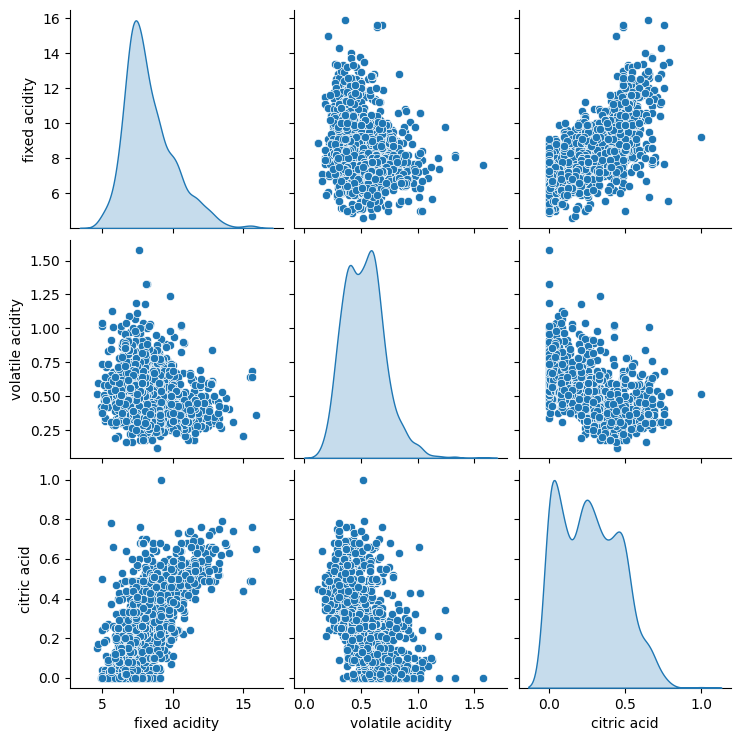

In [120]:
# Pairplot
sns.pairplot(wine_quality.iloc[:,:3], kind='scatter', diag_kind='kde')
plt.savefig('./images/ch07_23.png', bbox_inches='tight', pad_inches=0.1)
plt.show()